<a href="https://colab.research.google.com/github/babarmalik6444/CodeChallenge/blob/main/S2021313003_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [97]:
data = pd.read_csv('/content/AB_NYC_2019.csv')

In [98]:
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [99]:
data.shape

(48895, 16)

In [100]:
data.corr()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588290,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.291828,0.133272,0.085468
host_id,0.588290,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.296417,0.154950,0.203492
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.010142,0.019517,-0.010983
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.145948,-0.114713,0.082731
price,0.010619,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,0.291828,0.296417,-0.010142,0.145948,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


In [101]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [102]:
#check if price have zero value 
data = data[data.price != 0].copy()

In [109]:
#handle null or Nan value 
data.fillna(data.mean(), inplace=True)

In [139]:
#here we select the important columns according to correlation 

indx = np.random.rand(len(data)) <0.8
trainingSet = data[indx]
test = data[~indx]

trainingSet = trainingSet[['room_type','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]

test = test[['room_type','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]

In [125]:
trainingSet.head()

,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Private room,149,1,9,0.210000,6,365
2,Private room,150,3,0,1.373128,1,365
3,Entire home/apt,89,1,270,4.640000,1,194
4,Entire home/apt,80,10,9,0.100000,1,0
5,Entire home/apt,200,3,74,0.590000,1,129


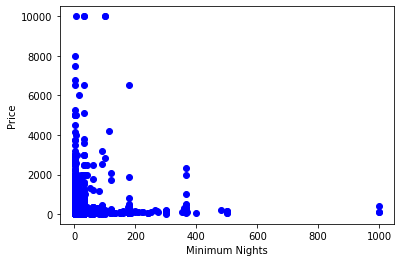

In [126]:
#check the data relation with price 
plt.scatter(trainingSet.minimum_nights, trainingSet.price,color='blue')
plt.xlabel('Minimum Nights')
plt.ylabel('Price')
plt.show()

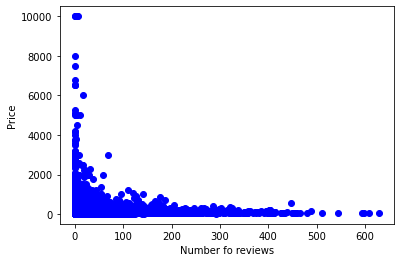

In [127]:
plt.scatter(trainingSet.number_of_reviews, trainingSet.price,color='blue')
plt.xlabel('Number fo reviews')
plt.ylabel('Price')
plt.show()

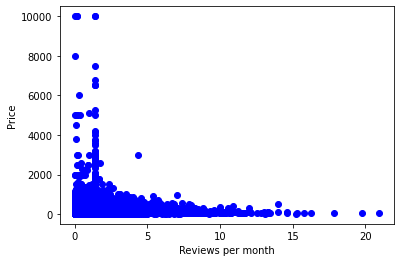

In [128]:
plt.scatter(trainingSet.reviews_per_month, trainingSet.price,color='blue')
plt.xlabel('Reviews per month')
plt.ylabel('Price')
plt.show()

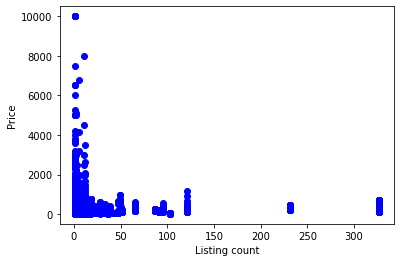

In [129]:
plt.scatter(trainingSet.calculated_host_listings_count, trainingSet.price,color='blue')
plt.xlabel('Listing count')
plt.ylabel('Price')
plt.show()

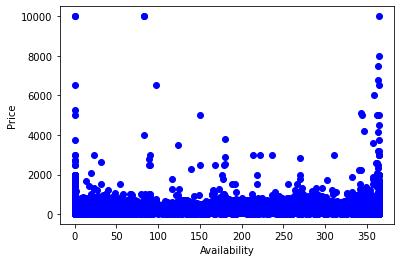

In [130]:
plt.scatter(trainingSet.availability_365, trainingSet.price,color='blue')
plt.xlabel('Availability')
plt.ylabel('Price')
plt.show()

In [140]:
#room type is an important fector in data , but that is a categorical variable 
#we need to transform the data.
#I will use get_dummies() for data 
trainingSet = pd.get_dummies(data=trainingSet, columns=['room_type'])
test = pd.get_dummies(data=test, columns=['room_type'])

In [132]:
trainingSet.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,149,1,9,0.210000,6,365,0,1,0
2,150,3,0,1.373128,1,365,0,1,0
3,89,1,270,4.640000,1,194,1,0,0
4,80,10,9,0.100000,1,0,1,0,0
5,200,3,74,0.590000,1,129,1,0,0


In [133]:
trainingSet.columns

Index(['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room'],
      dtype='object')

In [134]:
trainingSet.corr()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
price,1.000000,0.050280,-0.049186,-0.025394,0.059970,0.087897,0.262183,-0.245872,-0.056014
minimum_nights,0.050280,1.000000,-0.085312,-0.096026,0.131493,0.146580,0.076107,-0.075360,-0.003185
number_of_reviews,-0.049186,-0.085312,1.000000,0.532916,-0.072699,0.174496,-0.011960,0.018806,-0.022328
reviews_per_month,-0.025394,-0.096026,0.532916,1.000000,-0.006797,0.165689,-0.036445,0.034634,0.006291
calculated_host_listings_count,0.059970,0.131493,-0.072699,-0.006797,1.000000,0.228370,0.111821,-0.108479,-0.012041
availability_365,0.087897,0.146580,0.174496,0.165689,0.228370,1.000000,-0.003507,-0.013144,0.054621
room_type_Entire home/apt,0.262183,0.076107,-0.011960,-0.036445,0.111821,-0.003507,1.000000,-0.953618,-0.161748
room_type_Private room,-0.245872,-0.075360,0.018806,0.034634,-0.108479,-0.013144,-0.953618,1.000000,-0.142810
room_type_Shared room,-0.056014,-0.003185,-0.022328,0.006291,-0.012041,0.054621,-0.161748,-0.142810,1.000000


In [187]:
#check test data 
test.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
5,200,3,74,0.590000,1,129,1,0,0
11,85,2,188,1.500000,1,39,0,1,0
12,89,4,167,1.340000,3,314,0,1,0
17,140,1,260,2.120000,1,12,0,1,0
26,80,4,0,1.373128,1,0,0,1,0


In [189]:
#try with one attribte 
#lets train the model on selected columns 
lreg = linear_model.LinearRegression()

#trainng

X = np.asanyarray(trainingSet['minimum_nights'])
y = np.asanyarray(trainingSet['price'])

lreg.fit(X.reshape(-1,1), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [191]:
y_pred = lreg.predict([[4]])
print(y_pred)
mean_squared_error(y_pred, [200])

[150.75163123]


2425.401826695281

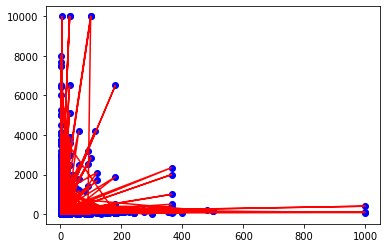

In [154]:
plt.scatter(trainingSet.minimum_nights, trainingSet.price,color = 'blue')
plt.plot(X, y, 'r-')

In [203]:
#check test data 
test.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
5,200,3,74,0.590000,1,129,1,0,0
11,85,2,188,1.500000,1,39,0,1,0
12,89,4,167,1.340000,3,314,0,1,0
17,140,1,260,2.120000,1,12,0,1,0
26,80,4,0,1.373128,1,0,0,1,0


In [218]:
#lets train the model on selected columns 
lreg = linear_model.LinearRegression()

#trainng

X = np.asanyarray(trainingSet[['minimum_nights', 'number_of_reviews' ]])
y = np.asanyarray(trainingSet['price'])

lreg.fit(X, y)

y_pre = lreg.predict([[3,74]])
print(y_pre)
mean_squared_error(y_pre, [200])*2

[138.16872814]


7646.212359849469

In [219]:
#lets train the model on selected columns 
lreg = linear_model.LinearRegression()

#trainng

X = np.asanyarray(trainingSet[['minimum_nights', 'number_of_reviews' , 'reviews_per_month' ]])
y = np.asanyarray(trainingSet['price'])

lreg.fit(X, y)

y_pre = lreg.predict([[3,74,0.590000]])
print(y_pre)
mean_squared_error(y_pre, [200])*2

[135.46344809]


8329.9330658675

In [220]:
#lets train the model on selected columns 
lreg = linear_model.LinearRegression()

#trainng

X = np.asanyarray(trainingSet[['minimum_nights', 'number_of_reviews' , 'reviews_per_month','calculated_host_listings_count' ]])
y = np.asanyarray(trainingSet['price'])

lreg.fit(X, y)

y_pre = lreg.predict([[3,74,0.590000,1]])
print(y_pre)
mean_squared_error(y_pre, [200])*2

[135.14240695]


8413.014751739205

In [221]:
#lets train the model on selected columns 
lreg = linear_model.LinearRegression()

#trainng

X = np.asanyarray(trainingSet[['minimum_nights', 'number_of_reviews' , 'reviews_per_month','calculated_host_listings_count',
                               'availability_365']])
y = np.asanyarray(trainingSet['price'])

lreg.fit(X, y)

y_pre = lreg.predict([[3,74,0.590000,1,129]])
print(y_pre)
mean_squared_error(y_pre, [200])*2

[136.47546704]


8070.732574811068

In [222]:
#lets train the model on selected columns 
lreg = linear_model.LinearRegression()

#trainng

X = np.asanyarray(trainingSet[['minimum_nights', 'number_of_reviews' , 'reviews_per_month','calculated_host_listings_count',
                               'availability_365', 'room_type_Entire home/apt']])
y = np.asanyarray(trainingSet['price'])

lreg.fit(X, y)

y_pre = lreg.predict([[3,74,0.590000,1,129,1]])
print(y_pre)
mean_squared_error(y_pre, [200])*2

[193.13976788]


94.1255695575874

In [213]:
#lets train the model on selected columns 
lreg = linear_model.LinearRegression()

#trainng

X = np.asanyarray(trainingSet[['minimum_nights', 'number_of_reviews' , 'reviews_per_month','calculated_host_listings_count',
                               'availability_365', 'room_type_Entire home/apt', 'room_type_Private room']])
y = np.asanyarray(trainingSet['price'])

lreg.fit(X, y)

y_pre = lreg.predict([[3,74,0.590000,1,129,1,0]])
print(y_pre)
mean_squared_error(y_pre, [200])**2

[192.91745635]


2516.268831686089

In [223]:
#lets train the model on selected columns 
lreg = linear_model.LinearRegression()

#trainng

X = np.asanyarray(trainingSet[['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count',
                'availability_365', 'room_type_Entire home/apt', 'room_type_Private room', 'room_type_Shared room']])
y = np.asanyarray(trainingSet['price'])

lreg.fit(X, y)

y_pre = lreg.predict([[3,74,0.590000,1,129,1,0,0]])
print(y_pre)
mean_squared_error(y_pre, [200])*2




[192.91745635]


100.32484899939529

In [224]:
#lets remove the minimum_nights and test 
lreg = linear_model.LinearRegression()

#trainng

X = np.asanyarray(trainingSet[['number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count',
                'availability_365', 'room_type_Entire home/apt', 'room_type_Private room', 'room_type_Shared room']])
y = np.asanyarray(trainingSet['price'])

lreg.fit(X, y)

y_pre = lreg.predict([[74,0.590000,1,129,1,0,0]])
print(y_pre)
mean_squared_error(y_pre, [200])*2

[193.58659733]


82.26346763402385

In [ ]:
#lets remove availability_365 and test 

In [226]:
#lets remove calculated_host_listings_count to test 
lreg = linear_model.LinearRegression()

#trainng

X = np.asanyarray(trainingSet[['number_of_reviews', 'reviews_per_month',
                 'room_type_Entire home/apt', 'room_type_Private room', 'room_type_Shared room']])
y = np.asanyarray(trainingSet['price'])

lreg.fit(X, y)

y_pre = lreg.predict([[74,0.590000,1,0,0]])
print(y_pre)
mean_squared_error(y_pre, [200])*2

[193.06880305]


96.08298244891286

In [241]:
#lets remove calculated_host_listings_count to test 
#lets remove the minimum_nights and test 
lreg = linear_model.LinearRegression()

#trainng

X = np.asanyarray(trainingSet[['number_of_reviews', 'reviews_per_month',
                'availability_365', 'room_type_Entire home/apt', 'room_type_Private room', 'room_type_Shared room']])
y = np.asanyarray(trainingSet['price'])

lreg.fit(X, y)

y_pre = lreg.predict([[74,0.590000,129,1,0,0]])
print(y_pre)
mean_squared_error(y_pre, [200])*2

[193.76516669]


77.7462929262461

In [243]:
y_pre = lreg.predict([[167,	1.340000	,314,	0	,1,	0]])
print(y_pre)
mean_squared_error(y_pre, [89])*2

[72.24948443]


561.1595435794187

In [231]:
#in above tests my MSD is least at 77.74 in above 2nd last model 
#so I can use that model 

In [230]:
#check test data 
test.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
5,200,3,74,0.590000,1,129,1,0,0
11,85,2,188,1.500000,1,39,0,1,0
12,89,4,167,1.340000,3,314,0,1,0
17,140,1,260,2.120000,1,12,0,1,0
26,80,4,0,1.373128,1,0,0,1,0
